In [17]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from text_recognizer.models.line_cnn import LineCnnFixedWidth, LineCnnSlidingWindow, LineCnnAllConv
from text_recognizer.datasets.emnist_lines import EmnistLinesDataset
from training.util import train_model, evaluate_model

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset = EmnistLinesDataset()
dataset.load_or_generate_data()

EmnistLinesDataset loading data from HDF5...


In [12]:
model = LineCnnFixedWidth()
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 896)           0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 32, 28, 1)     0         
_________________________________________________________________
permute_4 (Permute)          (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 32, 65)            1206977   
Total params: 1,206,977
Trainable params: 1,206,977
Non-trainable params: 0
_________________________________________________________________
Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 7s 985us/step - loss: 1.2112 - acc: 0.7233 - val_loss: 0.6560 - val_acc: 0.8219
Epoch 2/10
7500/7500 [==============================] - 6s 865us/step - loss: 0.

[0.34488923597335813, 0.8963125]

('carry_big_sticks_over_laos______', 0.6576573)

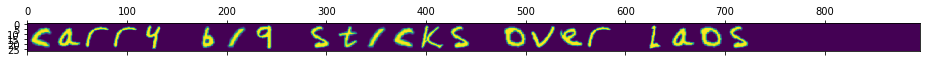

In [13]:
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

## Now let's introduce overlap

In [2]:
dataset = EmnistLinesDataset(max_overlap=0.4)
dataset.load_or_generate_data()

EmnistLinesDataset loading data from HDF5...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        (None, 28, 896)           0         
_________________________________________________________________
reshape_63 (Reshape)         (None, 28, 32, 28, 1)     0         
_________________________________________________________________
permute_7 (Permute)          (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_73 (TimeDis (None, 32, 65)            1206977   
Total params: 1,206,977
Trainable params: 1,206,977
Non-trainable params: 0
_________________________________________________________________
Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 8s 1ms/step - loss: 1.9950 - acc: 0.5282 - val_loss: 1.7493 - val_acc: 0.5772
Epoch 2/10
7500/7500 [==============================] - 6s 826us/step - loss: 1.69

('carrlbig tr eeooarlaos__________', 0.120589405)

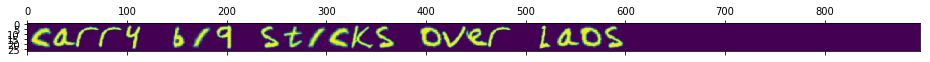

In [83]:
model = LineCnnFixedWidth()
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        (None, 28, 896)           0         
_________________________________________________________________
reshape_65 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
lambda_79 (Lambda)           (None, 32, 28, 28, 1)     0         
_________________________________________________________________
time_distributed_75 (TimeDis (None, 32, 128)           1198592   
_________________________________________________________________
lambda_80 (Lambda)           (None, 32, 128, 1)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 32, 1, 65)         8385      
_________________________________________________________________
lambda_81 (Lambda)           (None, 32, 65)            0         
Total para

('carrebrg treceoueriaos__________', 0.12534094)

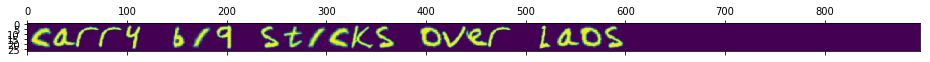

In [85]:
# This one should be exactly the same

model = LineCnnSlidingWindow(window_fraction=1, window_stride=1)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_61 (InputLayer)        (None, 28, 896)           0         
_________________________________________________________________
reshape_66 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
lambda_82 (Lambda)           (None, 64, 28, 14, 1)     0         
_________________________________________________________________
time_distributed_76 (TimeDis (None, 64, 128)           510464    
_________________________________________________________________
lambda_83 (Lambda)           (None, 64, 128, 1)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 32, 1, 65)         16705     
_________________________________________________________________
lambda_84 (Lambda)           (None, 32, 65)            0         
Total para

('earrebrg troceo erlaos__________', 0.11464616)

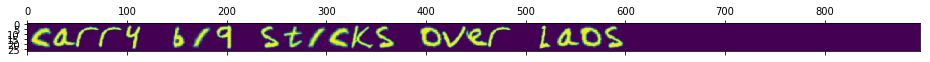

In [86]:
# This one is now looking at half-letter-widths

model = LineCnnSlidingWindow(window_fraction=0.5, window_stride=0.5)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 896)           0         
_________________________________________________________________
reshape_20 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
lambda_14 (Lambda)           (None, 64, 28, 28, 1)     0         
_________________________________________________________________
time_distributed (TimeDistri (None, 64, 128)           1198592   
_________________________________________________________________
lambda_15 (Lambda)           (None, 64, 128, 1)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 1, 65)         16705     
_________________________________________________________________
lambda_16 (Lambda)           (None, 32, 65)            0         
Total para

('ea rlbrg ar asooerlaos__________', 0.13979314)

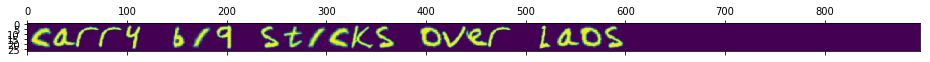

In [25]:
# This one is now looking at full-letter-widths with half-letter-width stride

model = LineCnnSlidingWindow(window_fraction=1, window_stride=0.5)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

In [46]:
# This one is all-conv, looking at letter-sized windows

model = LineCnnAllConv(window_fraction=1, window_stride=1)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_41 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 28, 896, 32)       320       
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 28, 896, 64)       18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 448, 64)       0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 14, 448, 64)       0         
_________________________________________________________________
lambda_39 (Lambda)           (None, 32, 14, 12544)     0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected lambda_39 to have 4 dimensions, but got array with shape (10000, 32, 65)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_16 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 896, 32)       320       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 896, 64)       18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 448, 64)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 448, 64)       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 1, 64, 128)        802944    
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 64, 128)        0         
__________

('corri reserceeo eriaos__________', 0.105901055)

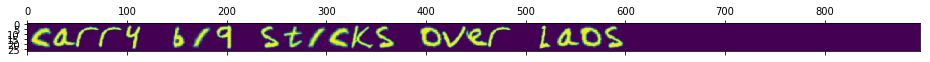

In [21]:
# This one is all-conv, looking at half-letter-sized windows

model = LineCnnAllConv(window_fraction=0.5, window_stride=0.5)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_44 (Reshape)         (None, 28, 896, 1)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 28, 896, 32)       320       
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 28, 896, 64)       18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 448, 64)       0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 14, 448, 64)       0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 1, 63, 128)        1605760   
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 1, 64, 128)        0         
__________

('carr  ie erce ooe laos__________', 0.13315473)

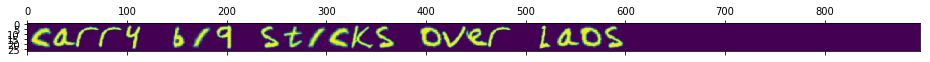

In [49]:
# This one is all-conv, looking at letter-sized windows with half-stride

model = LineCnnAllConv(window_fraction=1, window_stride=0.5)
history = train_model(
    model=model.model,
    x_train=dataset.x_train,
    y_train=dataset.y_train,
    epochs=10,
    batch_size=128,
    loss='categorical_crossentropy'
)
evaluate_model(model.model, dataset.x_test, dataset.y_test)
plt.matshow(dataset.x_test[0])
model.predict_on_image(dataset.x_test[0])